Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


c:\Users\yashd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\yashd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.2510 - loss: 2.4151 - val_accuracy: 0.3817 - val_loss: 1.5549
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 921ms/step - accuracy: 0.4497 - loss: 1.4230 - val_accuracy: 0.3996 - val_loss: 1.4557
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5046 - loss: 1.2263 - val_accuracy: 0.4453 - val_loss: 1.3533
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6032 - loss: 1.0866 - val_accuracy: 0.4831 - val_loss: 1.3861
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 993ms/step - accuracy: 0.6722 - loss: 0.8964 - val_accuracy: 0.4414 - val_loss: 1.4970
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 988ms/step - accuracy: 0.7318 - loss: 0.7530 - val_accuracy: 0.4930 - val_loss: 1.4093
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8048 - loss: 0.5984 - val_accuracy: 0.5249 - val_loss: 1.4564
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8400 - loss: 0.4595 - val_accuracy: 0.5050 - 

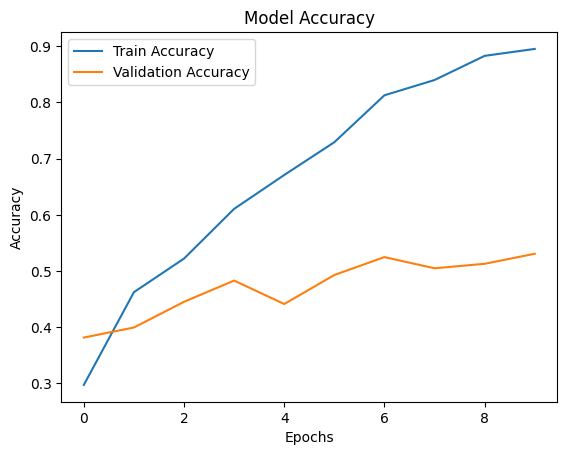

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set dataset path
dataset_path = "../dataset/"

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(dataset_path, target_size=(150, 150),
                                              batch_size=32, class_mode='categorical',
                                              subset='training')

val_generator = datagen.flow_from_directory(dataset_path, target_size=(150, 150),
                                            batch_size=32, class_mode='categorical',
                                            subset='validation')

# Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 categories
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save Model
model.save("../models/waste_classifier.h5")

# Plot Accuracy & Loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
